## **Análisis de datos de retail**

En el siguiente notebook se analiza el dataset retail-sales de Kaggle, que contiene datos de ventas por categorias de tiendas en el periodo 2023 a 2024

### **1. Importación de librerias y de los datos**

In [11]:
# importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# datos y conversion a dataframe
retail_sales = pd.read_csv('../data/retail_sales.csv')
print(retail_sales.head(10))

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   
5               6  2023-04-25     CUST006  Female   45           Beauty   
6               7  2023-03-13     CUST007    Male   46         Clothing   
7               8  2023-02-22     CUST008    Male   30      Electronics   
8               9  2023-12-13     CUST009    Male   63      Electronics   
9              10  2023-10-07     CUST010  Female   52         Clothing   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30 

### **2. Limpieza de los datos**

En esta sección se busca realizar una limpieza de los datos, como rellenar datos faltantes, igualar tipos de datos y encontrar datos duplicados.

In [13]:
# ultimas 5 filas del dataframe
print(retail_sales.tail(5))

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
995         1              50            50  
996         3              30            90  
997         4              25           100  
998         3              50           150  
999         4              30           120  


In [14]:
# info del retail_sales
print(retail_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [15]:
# estadisticas
print("Estadistica descriptiva del dataset")
print(retail_sales.describe())

Estadistica descriptiva del dataset
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


### **2.1. Conversión de tipos de datos**

In [16]:
# tipos de datos
print(retail_sales.dtypes)

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


In [17]:
# objeto a string
retail_sales = retail_sales.astype({col: 'string' for col in retail_sales.select_dtypes(include='object').columns})
print(retail_sales.dtypes)

Transaction ID               int64
Date                string[python]
Customer ID         string[python]
Gender              string[python]
Age                          int64
Product Category    string[python]
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object


In [18]:
# string a datetime 
retail_sales['Date']=pd.to_datetime(retail_sales['Date'])
print(retail_sales.dtypes)

Transaction ID               int64
Date                datetime64[ns]
Customer ID         string[python]
Gender              string[python]
Age                          int64
Product Category    string[python]
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object


In [19]:
# valores duplicados
duplicados = retail_sales.duplicated()

# contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


In [20]:
# dataframe
retail_sales.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


### **2.2. Consistencia de datos categóricos**

Inconsistencias en los valores categóricos (por ejemplo, ‘female’, ‘FEMALE’, ‘feMale’).

In [21]:
# columnas categoricas a minusculas 
retail_sales['Gender'] = retail_sales['Gender'].str.lower()
retail_sales['Product Category'] = retail_sales['Product Category'].str.lower()

# valores unicos 
print("Valores únicos en la columna 'Gender':", retail_sales['Gender'].unique())
print("Valores únicos en la columna 'Product Category':", retail_sales['Product Category'].unique())

Valores únicos en la columna 'Gender': <StringArray>
['male', 'female']
Length: 2, dtype: string
Valores únicos en la columna 'Product Category': <StringArray>
['beauty', 'clothing', 'electronics']
Length: 3, dtype: string


### **2.3. Manejo de datos faltantes**

En esta sección se analiza los valores faltantes en las columnas y se buscan métodos para rellenarlos en caso de ser necesario.

In [22]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=retail_sales.shape[0]-retail_sales.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=retail_sales.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(retail_sales.isnull().sum(axis=0)/retail_sales.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Transaction ID,1000,0,0.0
Date,1000,0,0.0
Customer ID,1000,0,0.0
Gender,1000,0,0.0
Age,1000,0,0.0
Product Category,1000,0,0.0
Quantity,1000,0,0.0
Price per Unit,1000,0,0.0
Total Amount,1000,0,0.0


### **3. Análisis exploratorio de los datos**

In [70]:
# dataframe
retail_sales.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,male,34,beauty,3,50,150
1,2,2023-02-27,CUST002,female,26,clothing,2,500,1000
2,3,2023-01-13,CUST003,male,50,electronics,1,30,30
3,4,2023-05-21,CUST004,male,37,clothing,1,500,500
4,5,2023-05-06,CUST005,male,30,beauty,2,50,100
5,6,2023-04-25,CUST006,female,45,beauty,1,30,30
6,7,2023-03-13,CUST007,male,46,clothing,2,25,50
7,8,2023-02-22,CUST008,male,30,electronics,4,25,100
8,9,2023-12-13,CUST009,male,63,electronics,2,300,600
9,10,2023-10-07,CUST010,female,52,clothing,4,50,200


In [71]:
# valores unicos en la columna producto
print(retail_sales['Product Category'].value_counts())

Product Category
clothing       351
electronics    342
beauty         307
Name: count, dtype: Int64


In [72]:
# ventas sean superiores a 50
print(retail_sales[retail_sales['Total Amount']>50])

     Transaction ID       Date Customer ID  Gender  Age Product Category  \
0                 1 2023-11-24     CUST001    male   34           beauty   
1                 2 2023-02-27     CUST002  female   26         clothing   
3                 4 2023-05-21     CUST004    male   37         clothing   
4                 5 2023-05-06     CUST005    male   30           beauty   
7                 8 2023-02-22     CUST008    male   30      electronics   
..              ...        ...         ...     ...  ...              ...   
993             994 2023-12-18     CUST994  female   51           beauty   
996             997 2023-11-17     CUST997    male   52           beauty   
997             998 2023-10-29     CUST998  female   23           beauty   
998             999 2023-12-05     CUST999  female   36      electronics   
999            1000 2023-04-12    CUST1000    male   47      electronics   

     Quantity  Price per Unit  Total Amount  
0           3              50           1

In [73]:
# precio sea menor a 30
print(retail_sales[retail_sales['Price per Unit']<30])

     Transaction ID       Date Customer ID  Gender  Age Product Category  \
6                 7 2023-03-13     CUST007    male   46         clothing   
7                 8 2023-02-22     CUST008    male   30      electronics   
11               12 2023-10-30     CUST012    male   35           beauty   
16               17 2023-04-22     CUST017  female   27         clothing   
17               18 2023-04-30     CUST018  female   47      electronics   
..              ...        ...         ...     ...  ...              ...   
979             980 2023-07-29     CUST980  female   31      electronics   
984             985 2023-05-30     CUST985  female   19      electronics   
987             988 2023-05-28     CUST988  female   63         clothing   
988             989 2023-12-28     CUST989  female   44      electronics   
997             998 2023-10-29     CUST998  female   23           beauty   

     Quantity  Price per Unit  Total Amount  
6           2              25            

In [74]:
# ventas de beauty mayores a 50
print(retail_sales.query('`Product Category` == "beauty" & `Total Amount` > 50'))

     Transaction ID       Date Customer ID  Gender  Age Product Category  \
0                 1 2023-11-24     CUST001    male   34           beauty   
4                 5 2023-05-06     CUST005    male   30           beauty   
11               12 2023-10-30     CUST012    male   35           beauty   
20               21 2023-01-14     CUST021  female   50           beauty   
27               28 2023-04-23     CUST028  female   43           beauty   
..              ...        ...         ...     ...  ...              ...   
981             982 2023-12-19     CUST982  female   46           beauty   
989             990 2023-05-25     CUST990  female   58           beauty   
993             994 2023-12-18     CUST994  female   51           beauty   
996             997 2023-11-17     CUST997    male   52           beauty   
997             998 2023-10-29     CUST998  female   23           beauty   

     Quantity  Price per Unit  Total Amount  
0           3              50           1

In [75]:
# columnas Producto y Ventas del DataFrame
print(retail_sales[['Product Category','Total Amount']])

    Product Category  Total Amount
0             beauty           150
1           clothing          1000
2        electronics            30
3           clothing           500
4             beauty           100
..               ...           ...
995         clothing            50
996           beauty            90
997           beauty           100
998      electronics           150
999      electronics           120

[1000 rows x 2 columns]


In [76]:
# filas de 5 a 10 y columnas Producto y ventas.
print(retail_sales.loc[5:10, ['Product Category', 'Total Amount']])

   Product Category  Total Amount
5            beauty            30
6          clothing            50
7       electronics           100
8       electronics           600
9          clothing           200
10         clothing           100


In [77]:
# primeras 5 filas y las primeras 3 columnas del DataFrame
print(retail_sales.iloc[0:5,0:3])

   Transaction ID       Date Customer ID
0               1 2023-11-24     CUST001
1               2 2023-02-27     CUST002
2               3 2023-01-13     CUST003
3               4 2023-05-21     CUST004
4               5 2023-05-06     CUST005


In [78]:
# datos por categoria
retail_sales_grouped = retail_sales.groupby("Product Category")

In [79]:
# total de ventas por categoria
sales_per_category = retail_sales_grouped['Total Amount'].sum()
print(sales_per_category)

Product Category
beauty         143515
clothing       155580
electronics    156905
Name: Total Amount, dtype: int64


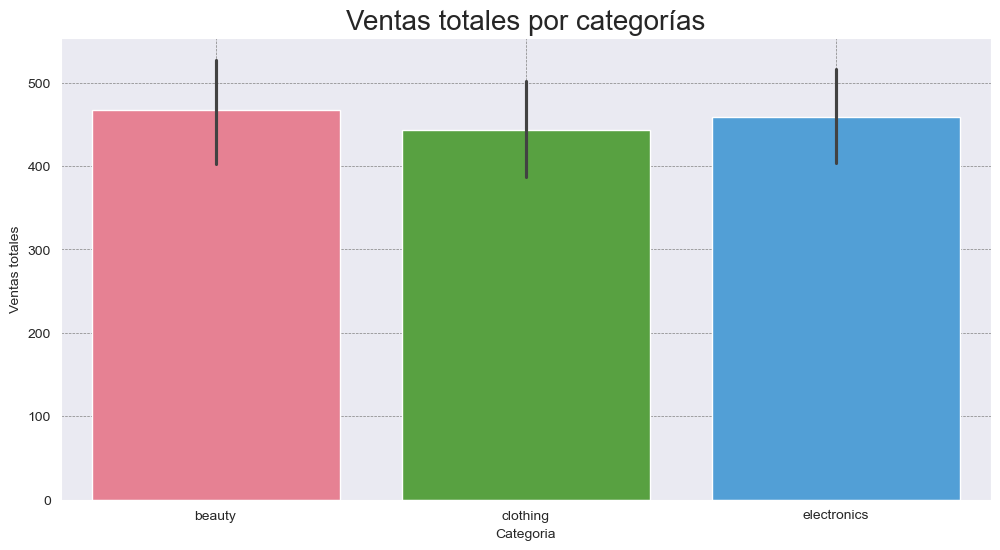

In [92]:
# crear figura y eje
fig, ax = plt.subplots(figsize=(12, 6))

# colores para el grafico
colors = sns.color_palette("husl", 3)

# grafico de barras por categoria
sns.barplot(data=retail_sales, x='Product Category', y='Total Amount', hue ='Product Category' , palette=colors, edgecolor='white')
ax.set_title('Ventas totales por categorías', fontsize=20)
ax.set_xlabel('Categoria', fontsize=10)
ax.set_ylabel('Ventas totales', fontsize=10)
sns.set_style("darkgrid")

# añadir cuadrícula
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# mostrar el gráfico
plt.show()

El gráfico de ventas totales por categoría muestra que los productos que más ingreso de dinero generan en la tienda son los de la sección beauty y electronics.

In [87]:
# promedio de ventas por categoria
mean_sales_per_category = retail_sales_grouped['Total Amount'].mean()
print(mean_sales_per_category)
print(type(mean_sales_per_category))
print(type(retail_sales_grouped))

Product Category
beauty         467.475570
clothing       443.247863
electronics    458.786550
Name: Total Amount, dtype: float64
<class 'pandas.core.series.Series'>
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [88]:
# cantidad de ventas por categoria
count_sales_per_category = retail_sales_grouped['Total Amount'].count()
print(count_sales_per_category)

Product Category
beauty         307
clothing       351
electronics    342
Name: Total Amount, dtype: int64


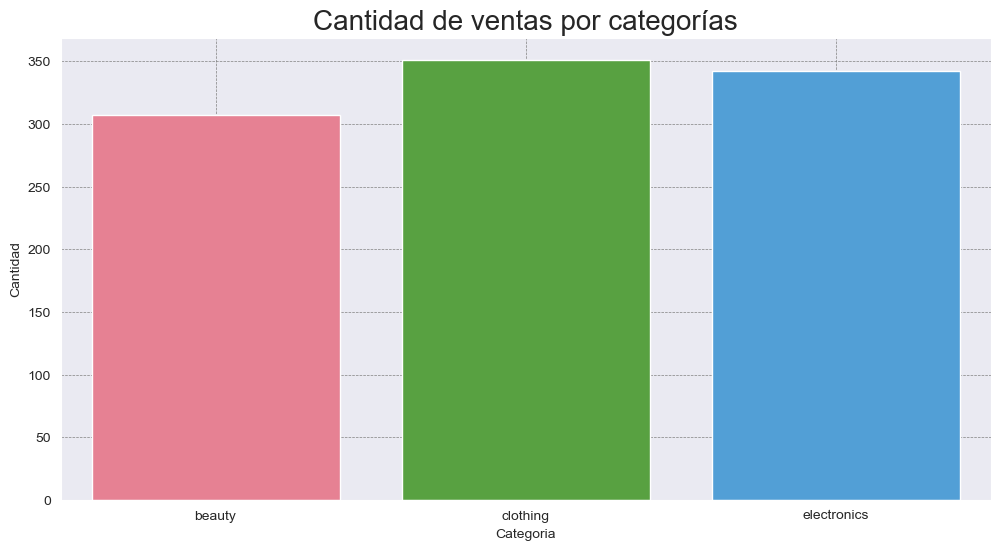

In [96]:
# crear figura y eje
fig, ax = plt.subplots(figsize=(12, 6))

# colores para el grafico
colors = sns.color_palette("husl", 3)

# grafico de barras por categoria
sns.countplot(data=retail_sales, x='Product Category', hue='Product Category' , palette=colors, edgecolor='white', legend=False)
ax.set_title('Cantidad de ventas por categorías', fontsize=20)
ax.set_xlabel('Categoria', fontsize=10)
ax.set_ylabel('Cantidad', fontsize=10)
sns.set_style("darkgrid")

# añadir cuadrícula
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# mostrar el gráfico
plt.show()

En comparación al gráfico de total de ventas por categoría, donde se observó que las secciones de beauty y electronics son las que generan mayor cantidad de ingreso al local. En el gráfico de cantidad de ventas por categoría se nota que en realidad, los productos de clothing son los que se venden con mayor frecuencia, sin embargo como sus precios no son tan elevados en comparación a los productos de electronics y beauty, no generan ingresos importantes.

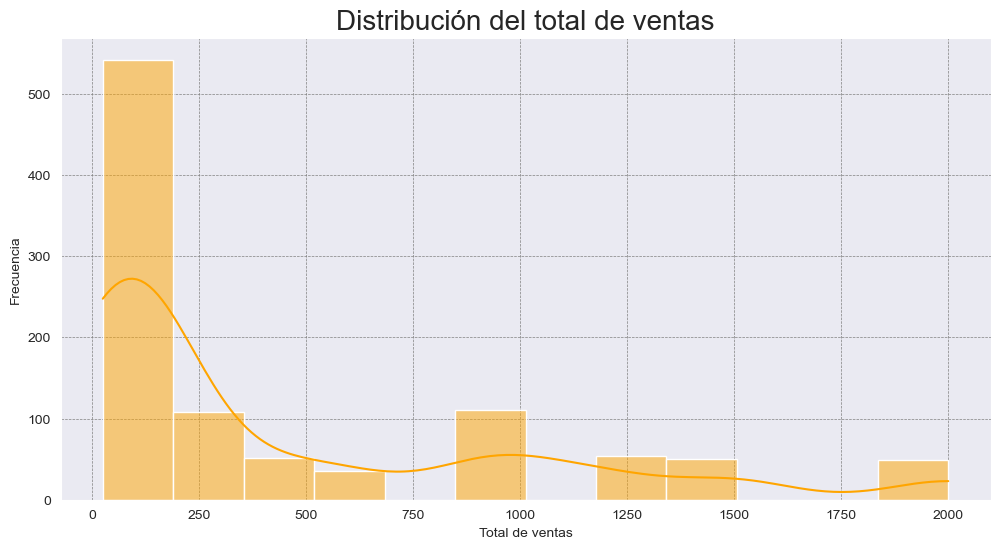

In [99]:
# crear figura y eje
fig, ax = plt.subplots(figsize=(12, 6))

# histograma de ventas
sns.histplot(data=retail_sales, x='Total Amount', kde=True , color='orange', edgecolor='white')
ax.set_title('Distribución del total de ventas', fontsize=20)
ax.set_xlabel('Total de ventas', fontsize=10)
ax.set_ylabel('Frecuencia', fontsize=10)
sns.set_style("darkgrid")

# añadir cuadrícula
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# mostrar el gráfico
plt.show()

Con el histograma de las ventas totales se puede observar que la distribución de los datos es irregular, y se da un máximo ventas menores a 250.

In [113]:
# agrupar por producto y edad
retail_sales_double_grouped = retail_sales.groupby(['Product Category','Age'])

In [114]:
# ventas por categoria y por edad
sales_per_category_age = retail_sales_double_grouped['Total Amount'].sum()
print(sales_per_category_age)

Product Category  Age
beauty            18     4960
                  19     4365
                  20     2525
                  21     8000
                  22     5530
                         ... 
electronics       60     7020
                  61     2900
                  62     6280
                  63     6625
                  64     1240
Name: Total Amount, Length: 141, dtype: int64


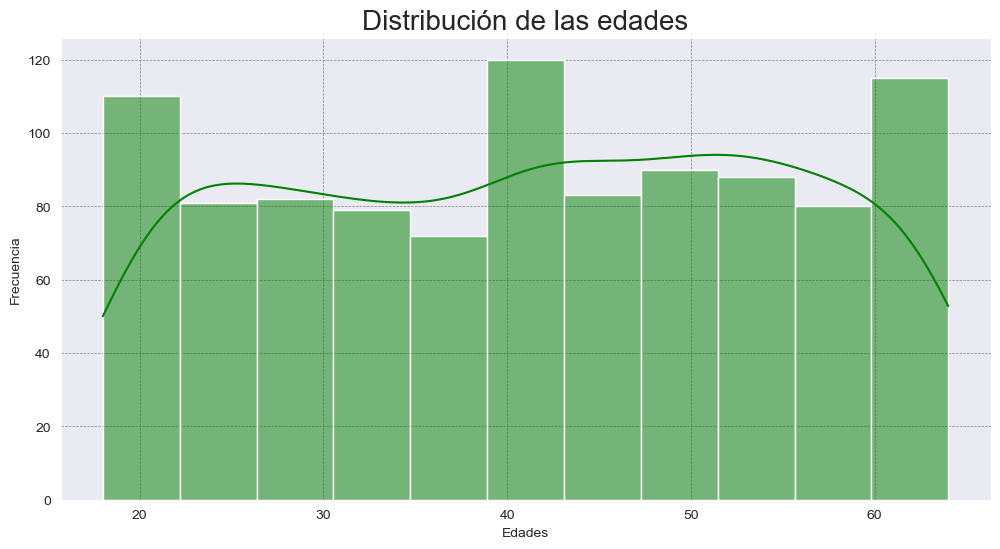

In [102]:
# crear figura y eje
fig, ax = plt.subplots(figsize=(12, 6))

# histograma de edades
sns.histplot(data=retail_sales, x='Age', kde=True , color='green', edgecolor='white')
ax.set_title('Distribución de las edades', fontsize=20)
ax.set_xlabel('Edades', fontsize=10)
ax.set_ylabel('Frecuencia', fontsize=10)
sns.set_style("darkgrid")

# añadir cuadrícula
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# mostrar el gráfico
plt.show()

La distribución de los datos en cuanto a las edades de los compradores es bastante homogénea, es decir que la frecuencia de compradores de edad comprendida entre 20 y 60 años es mas o menos constante. Además, se observa que los compradores de mayor frecuencia tienen edades en torno a 20, 40 y 60 años, en otras palabras, personas de estas edades son el público objetivo de la tienda.

In [107]:
# promedio de ventas por categoria y edad
mean_sales_per_category_age = retail_sales_double_grouped['Total Amount'].mean()
print(mean_sales_per_category_age)

Product Category  Age
beauty            18     551.111111
                  19     623.571429
                  20     315.625000
                  21     888.888889
                  22     614.444444
                            ...    
electronics       60     780.000000
                  61     580.000000
                  62     523.333333
                  63     736.111111
                  64     155.000000
Name: Total Amount, Length: 141, dtype: float64


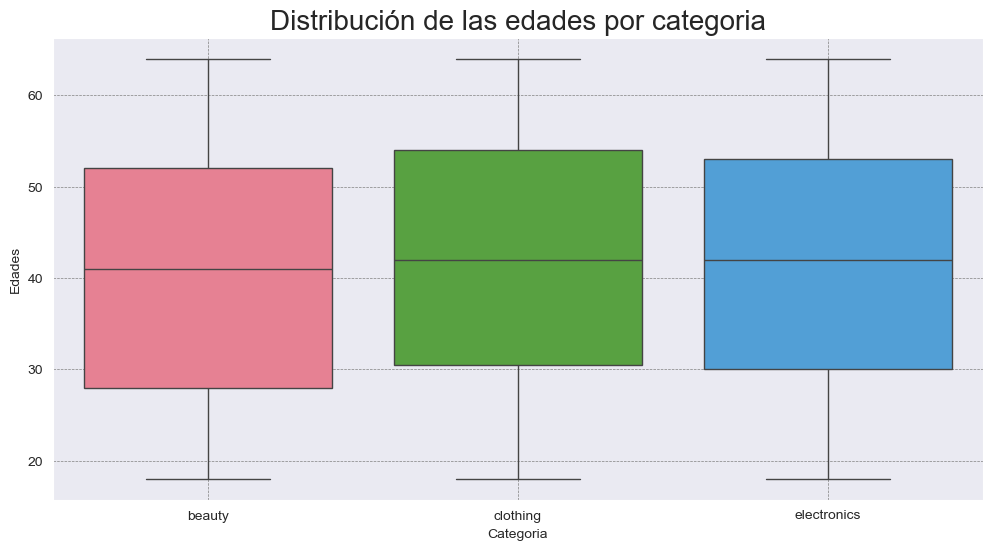

In [126]:
# crear figura y eje
fig, ax = plt.subplots(figsize=(12, 6))

# colores
colors = sns.color_palette("husl", 3)

# boxplot
sns.boxplot(data=retail_sales, x='Product Category', y='Age' , hue='Product Category', palette=colors, legend=False)
ax.set_title('Distribución de las edades por categoria', fontsize=20)
ax.set_xlabel('Categoria', fontsize=10)
ax.set_ylabel('Edades', fontsize=10)
sns.set_style("darkgrid")

# añadir cuadrícula
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# mostrar el gráfico
plt.show()

Con el boxplot se logra visualizar que no hay outliers en los datos analizados y que la mediana para las 3 categorias se encuentra en torno a 40 años de edad. Otro punto importante es que la distribución es homogénea, es decir, hay una variación de edades similar por cada categoría.

In [139]:
# agrupar por fechas
retail_sales_grouped_by_date = retail_sales.groupby('Date')['Total Amount'].mean().reset_index()

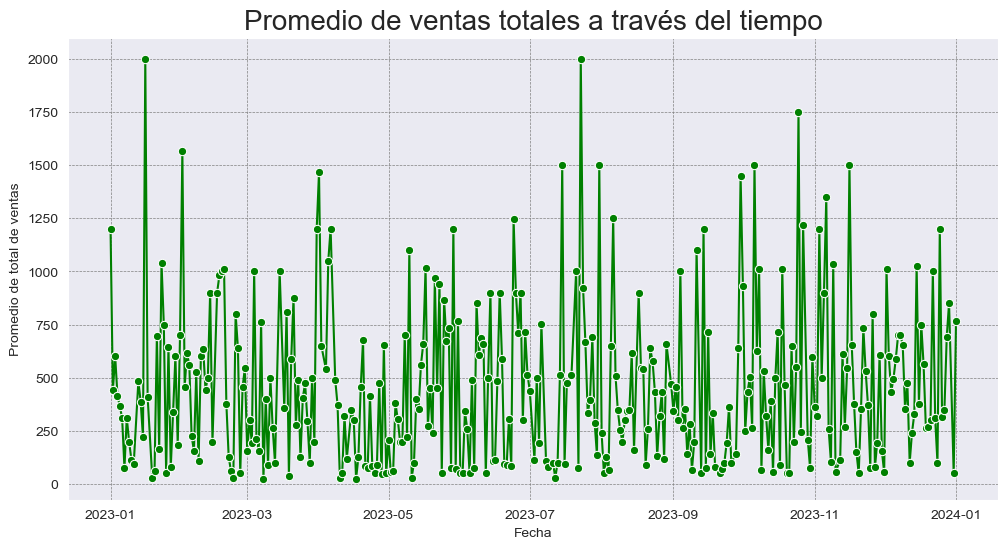

In [143]:
# crear figura y eje
fig, ax = plt.subplots(figsize=(12, 6))

# colores
colors = sns.color_palette("husl")

# grafico de lineas de ventas
sns.lineplot(data=retail_sales_grouped_by_date, x='Date', y='Total Amount' , marker='o' , color='green')
ax.set_title('Promedio de ventas totales a través del tiempo', fontsize=20)
ax.set_xlabel('Fecha', fontsize=10)
ax.set_ylabel('Promedio de total de ventas', fontsize=10)
sns.set_style("darkgrid")

# añadir cuadrícula
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# mostrar el gráfico
plt.show()

Se logra visualizar que, en promedio, las ventas tienen un máximo en los meses de enero, abril, julio y noviembre.

In [146]:
# fecha a numero para grafico de regresion
retail_sales_grouped_by_date['DateNumerico'] = retail_sales_grouped_by_date['Date'].map(pd.Timestamp.toordinal)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21484\1042671219.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(retail_sales_grouped_by_date['Date'].dt.strftime('%Y-%m'))


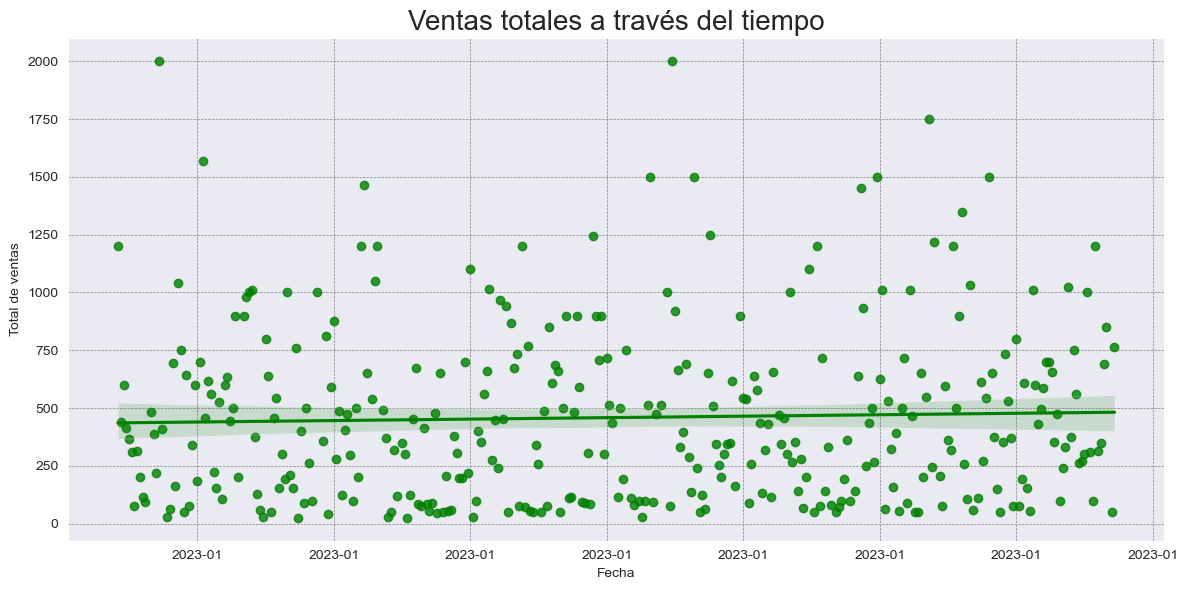

In [157]:
# crear figura y eje
fig, ax = plt.subplots(figsize=(12, 6))

# tendencia
sns.regplot(data=retail_sales_grouped_by_date, x='DateNumerico', y='Total Amount' , marker='o' , color='green', ax=ax)
ax.set_title('Ventas totales a través del tiempo', fontsize=20)
ax.set_xlabel('Fecha', fontsize=10)
ax.set_ylabel('Total de ventas', fontsize=10)
sns.set_style("darkgrid")

# añadir cuadrícula
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# agregar las fechas  
ax.set_xticklabels(retail_sales_grouped_by_date['Date'].dt.strftime('%Y-%m'))

# mostrar el gráfico
plt.tight_layout()
plt.show()

Se observa una ligera tendencia positiva en las ventas a través del tiempo.

In [160]:
# dataframe
retail_sales.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Sales Normalized,Level,MAD
0,1,2023-11-24,CUST001,male,34,beauty,3,50,150,0.063291,media,306.0
1,2,2023-02-27,CUST002,female,26,clothing,2,500,1000,0.493671,alta,544.0
2,3,2023-01-13,CUST003,male,50,electronics,1,30,30,0.002532,baja,426.0
3,4,2023-05-21,CUST004,male,37,clothing,1,500,500,0.240506,media,44.0
4,5,2023-05-06,CUST005,male,30,beauty,2,50,100,0.037975,media,356.0
5,6,2023-04-25,CUST006,female,45,beauty,1,30,30,0.002532,baja,426.0
6,7,2023-03-13,CUST007,male,46,clothing,2,25,50,0.012658,media,406.0
7,8,2023-02-22,CUST008,male,30,electronics,4,25,100,0.037975,media,356.0
8,9,2023-12-13,CUST009,male,63,electronics,2,300,600,0.291139,media,144.0
9,10,2023-10-07,CUST010,female,52,clothing,4,50,200,0.088608,media,256.0


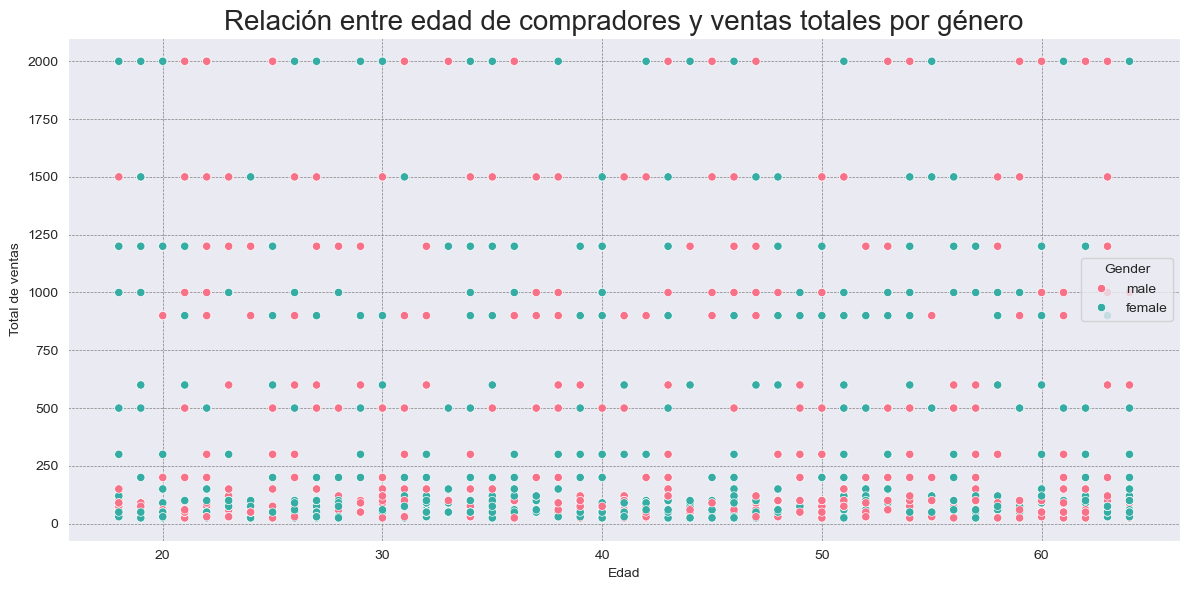

In [167]:
# crear figura y eje
fig, ax = plt.subplots(figsize=(12, 6))

# colores
colors = sns.color_palette("husl",2)

# grafico dispersion 
sns.scatterplot(data=retail_sales, x='Age', y='Total Amount', hue='Gender', palette=colors)
ax.set_title('Relación entre edad de compradores y ventas totales por género', fontsize=20)
ax.set_xlabel('Edad', fontsize=10)
ax.set_ylabel('Total de ventas', fontsize=10)
sns.set_style("darkgrid")

# añadir cuadrícula
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# mostrar el gráfico
plt.tight_layout()
plt.show()

Al parecer, segun el gráfico de dispersión entre las ventas totales y la edad no existe una correlación marcada, lo que puede deducirse de este gráfico es que las cantidades de ventas por debajo de 250 son realizadas por personas de prácticamente todas las edades y en mayor proporción en comparación a las ventas superiores a 1500.

In [116]:
# encontar los maximos y minimos de ventas
max_sales = retail_sales['Total Amount'].max()
min_sales = retail_sales['Total Amount'].min()

In [117]:
# duplicar el dataframe en otro para agregar columnas
retail_sales_added = retail_sales
# normalizar las ventas agregando una columna 
retail_sales_added['Sales Normalized'] = retail_sales_added['Total Amount'].apply(
    lambda x: (x - min_sales)/(max_sales - min_sales)
)
print(retail_sales_added)

     Transaction ID       Date Customer ID  Gender  Age Product Category  \
0                 1 2023-11-24     CUST001    male   34           beauty   
1                 2 2023-02-27     CUST002  female   26         clothing   
2                 3 2023-01-13     CUST003    male   50      electronics   
3                 4 2023-05-21     CUST004    male   37         clothing   
4                 5 2023-05-06     CUST005    male   30           beauty   
..              ...        ...         ...     ...  ...              ...   
995             996 2023-05-16     CUST996    male   62         clothing   
996             997 2023-11-17     CUST997    male   52           beauty   
997             998 2023-10-29     CUST998  female   23           beauty   
998             999 2023-12-05     CUST999  female   36      electronics   
999            1000 2023-04-12    CUST1000    male   47      electronics   

     Quantity  Price per Unit  Total Amount  Sales Normalized  Level    MAD  
0        

In [118]:
# crear una funcion que clasifique las ventas 
def sales_level(sales):
    if (sales >= 900):
        return('alta')
    elif (sales <= 30):
        return('baja')
    else:
        return('media')

In [119]:
# agregar una columna que categoriza las ventas como alto, medio o bajo
retail_sales_added['Level'] = retail_sales_added['Total Amount'].apply(sales_level)
print(retail_sales_added)

     Transaction ID       Date Customer ID  Gender  Age Product Category  \
0                 1 2023-11-24     CUST001    male   34           beauty   
1                 2 2023-02-27     CUST002  female   26         clothing   
2                 3 2023-01-13     CUST003    male   50      electronics   
3                 4 2023-05-21     CUST004    male   37         clothing   
4                 5 2023-05-06     CUST005    male   30           beauty   
..              ...        ...         ...     ...  ...              ...   
995             996 2023-05-16     CUST996    male   62         clothing   
996             997 2023-11-17     CUST997    male   52           beauty   
997             998 2023-10-29     CUST998  female   23           beauty   
998             999 2023-12-05     CUST999  female   36      electronics   
999            1000 2023-04-12    CUST1000    male   47      electronics   

     Quantity  Price per Unit  Total Amount  Sales Normalized  Level    MAD  
0        

In [120]:
# se calcula la media de las ventas
mean_sales = retail_sales_added['Total Amount'].mean()
retail_sales_added['MAD'] = retail_sales_added['Total Amount'].apply(lambda x: np.abs(x - mean_sales))
print (retail_sales_added)

     Transaction ID       Date Customer ID  Gender  Age Product Category  \
0                 1 2023-11-24     CUST001    male   34           beauty   
1                 2 2023-02-27     CUST002  female   26         clothing   
2                 3 2023-01-13     CUST003    male   50      electronics   
3                 4 2023-05-21     CUST004    male   37         clothing   
4                 5 2023-05-06     CUST005    male   30           beauty   
..              ...        ...         ...     ...  ...              ...   
995             996 2023-05-16     CUST996    male   62         clothing   
996             997 2023-11-17     CUST997    male   52           beauty   
997             998 2023-10-29     CUST998  female   23           beauty   
998             999 2023-12-05     CUST999  female   36      electronics   
999            1000 2023-04-12    CUST1000    male   47      electronics   

     Quantity  Price per Unit  Total Amount  Sales Normalized  Level    MAD  
0        

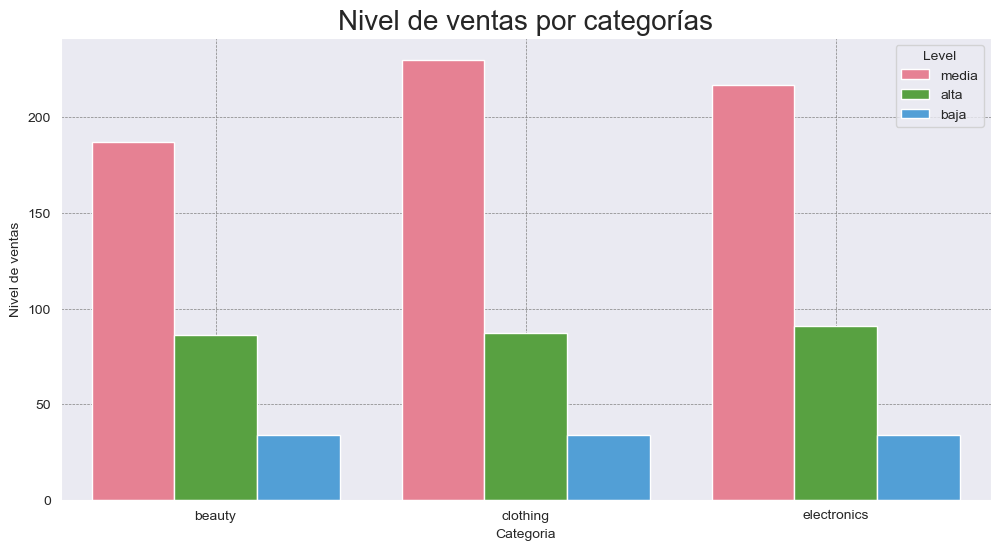

In [125]:
# crear figura y eje
fig, ax = plt.subplots(figsize=(12, 6))

# colores para el grafico
colors = sns.color_palette("husl", 3)

# grafico de conteo por nivel
sns.countplot(data=retail_sales_added, x='Product Category', hue='Level' , palette=colors, edgecolor='white', legend=True)
ax.set_title('Nivel de ventas por categorías', fontsize=20)
ax.set_xlabel('Categoria', fontsize=10)
ax.set_ylabel('Nivel de ventas', fontsize=10)
sns.set_style("darkgrid")

# añadir cuadrícula
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# mostrar el gráfico
plt.show()

En el gráfico se logra ver que las ventas, en general para las tres secciones, son de nivel medio. 